In [1]:
import svgutils.compose as sc
from IPython.display import SVG # /!\ note the 'SVG' function also in svgutils.compose
import numpy as np
import matplotlib.pyplot as plt

import Classes.LPPic_fields as fl

import pickle, json
import matplotlib.patheffects as PathEffects

import matplotlib as mpl
Paper_style = json.load(open("Paperstyle.json",'r'))
mpl.style.use(Paper_style)

ModuleNotFoundError: No module named 'svgutils'

In [ ]:
def is_main_module():
    """
    Returns whether this notebook is the main module
    ie not being run from another notebook
    """
    return __name__ == '__main__' and '__file__' not in globals()

In [ ]:
path = "/home/tavant/Data/R_theta/143_eps200/"
path = "/home/tavant/Data/R_theta/136_LongX/"
path = "/run/media/tavant/Data3/136_LongX/"

run = fl.field(path)

try:
    Ex = np.loadtxt("Ex_snapshot")
except:
    Ex = run.return_fromkey(int(run._nT*1/2),"Ej(1)").T

    np.savetxt("Ex_snapshot",Ex)
    
Ex = run.return_fromkey(150,"Phi").T


/home/tavant/these/code/venv/stand/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


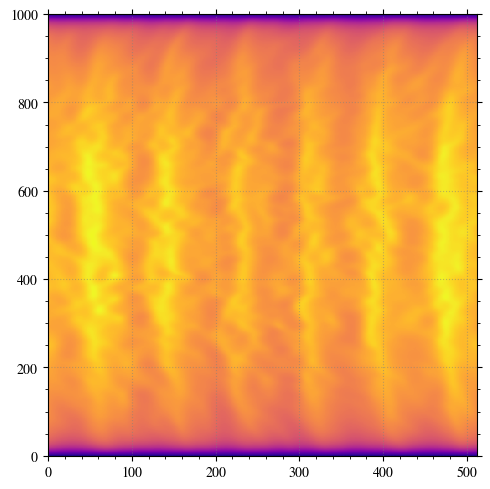

In [45]:
plt.figure()
plt.imshow(Ex)

In [ ]:
  
def add_rect(ax, heigh, pos, Lx, Ly):
    """ Add a gray rectangle up or down """
    
    "Calculate the dimentions from `pos` and `heigh`"
    if pos == "up":
        origine = (0, Ly)
        Ysize = abs(heigh)
    if pos == 'down':
        origine = (0, 0)
        Ysize = - abs(heigh)
    Xsize = Lx + 0.002  #I don't know why, but this is needed
    
    "Plot the Rectangle"
    ax.add_patch(plt.Rectangle(origine,Xsize, Ysize
                       ,facecolor='silver',
                          clip_on=False,linewidth = 0))
    
    "Calculate the uper line coords"
    LineXs = [0+0.002,Lx-0.002]
    LineYs = [origine[1]+Ysize]*2
    
    "Plot the line"
    l1 = mpl.lines.Line2D(LineXs,LineYs,color= "k",
                              clip_on=False)
    ax.add_line(l1)
    
    "Idem for the lower grey line"
    LineYs = [origine[1]]*2
    
    l2 = mpl.lines.Line2D(LineXs,LineYs,color= "k",alpha=0.5,linewidth = 1.5,
                              clip_on=False)
    ax.add_line(l2)

In [ ]:
import matplotlib as mpl

In [ ]:
def add_boundary(ax, rect_heigh, Lx, Ly):
    """Add the dashed line"""
    
    LineYs = [0 - rect_heigh, Ly + rect_heigh]
    l1 = mpl.lines.Line2D([0,0 ],LineYs,linestyle='--',color= "k",alpha=0.9,linewidth = 1.5,
                              clip_on=False)
    l2 = mpl.lines.Line2D([Lx,Lx ],LineYs,linestyle='--',color= "k",alpha=0.9,linewidth = 1.5,
                              clip_on=False)
    ax.add_line(l1)
    ax.add_line(l2)
    
def add_arrow(ax, center, lenght, heigh, color = "b"):
    """ Calculate the good coord to plot a TWO HEADED arrow"""
    
    Xbase = center[0] # - lenght/2
    Ybase = center[1]
    head_length = 2*lenght/3
    boddylenght = lenght/3
    ax.arrow(Xbase, Ybase, boddylenght, 0, head_length=head_length, facecolor = color,
         #edgecolor = 'w',
             width=0.1, clip_on=False)
    
    ax.arrow(Xbase, Ybase, -boddylenght, 0, head_length=head_length, facecolor = color,
         #edgecolor = 'w',
             width=0.1, clip_on=False)
    
def addVectors(ax, Lx, Ly):
    """Add the B_0 and E_0 vectors"""
    textbboxpad = 0.3
    alphaWhite = 0.2
    
    x0, x1 = [0.20*Lx]*2
    y0, y1 = [0.05*Ly, 0.25*Ly]
    head_length = 0.2*(y1-y0)
    a = ax.arrow(x0, y0, x1-x0, y1-y0, head_length=head_length,
             #edgecolor = 'w',
         facecolor = "k",  width=0.01, clip_on=False)
    a.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w',alpha = alphaWhite)])
    
    textposX = x0 + 0.04*Lx
    textposY = (y0 + y1)/2
    t = ax.text(textposX,textposY,r"${\bf B_0}$", fontsize = 18)
    #b = t.set_bbox(dict(facecolor='w', alpha=0.5, edgecolor='none',pad=textbboxpad))
    t.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w',alpha = alphaWhite)])

    center = (0.7* Lx, 0.1* Ly)
    width = 0.1 * Lx
    height = 0.1 * Ly
    Ellip = mpl.patches.Ellipse(center, width, height, linewidth = 1.5,
                                fill = False,
                                edgecolor = 'k')
    a = ax.add_artist(Ellip)
    a.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w',alpha = alphaWhite)])
    
    l3 = mpl.lines.Line2D([center[0],center[0]],[center[1], center[1]],marker='o',color= "k",
                          markersize=2, 
                                  clip_on=False)
    a = ax.add_line(l3)
    a.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w',alpha = alphaWhite)])
    
    textposX = center[0] - width*1.5
    textposY = center[1] + height*0.7
    t = ax.text(textposX,textposY,r"${\bf E_0}$", fontsize = 18)
    t.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w',alpha =alphaWhite)])
    #t.set_bbox(dict(facecolor='w', alpha=0.5, edgecolor='none',pad=textbboxpad))

def plot_snapshot(fig, ax, tabgrid,Lx,Ly, alpha = 0.5, colorbar = False, cmap = "seismic"):
    """plot the snapshot and return the fig, ax and limits"""
    import math
    extent = [0,Lx,0,Ly]
    
    # magnitude = int(math.log10(tabgrid.max()))
    magnitude = 0
    scaledtabgrid = tabgrid / 10**magnitude
    
    MinValue = round(scaledtabgrid.min(), -2)
    MaxValue = round(scaledtabgrid.max(), -2)*0.9
    #MaxValue = min(abs(MaxValue),abs(MinValue))
    #MaxValue = scaledtabgrid.max()
    # MinValue = -MaxValue
    MinValue = 150
    
    ticks = [MinValue,MaxValue]
    colorbarTicks = [ int(t) for t in ticks] #[0,MaxValue]
    colorbarTicks = [0,int(MaxValue)]

    norm = mpl.colors.Normalize( vmin = ticks[0], vmax = ticks[1],)
        
    im = ax.imshow(scaledtabgrid,cmap=cmap, 
              aspect=None,  #set to 1 for 1:1 aspect ratio
              alpha = alpha,
              extent=extent,
              norm = norm,
                   
              )

    ax.axis('off')
    
    if colorbar:
        from mpl_toolkits.axes_grid1 import make_axes_locatable
        colorbar_ax = fig.add_axes([0.98, 0.65, 0.05, 0.3])
        #ax2.axis("off")
        #divider = make_axes_locatable(colorbar_ax)
        #cax = divider.append_axes("right", size="5%", pad=0.35)
        cb = fig.colorbar(im, cax = colorbar_ax, ticks = ticks, extend='min')
        # cb.ax.set_yticklabels(colorbarTicks)  # vertically oriented colorbar
        # cb.set_label(r"$E_y \/ [kV/m]$", labelpad=-10, y=0.5, fontsize = 12)
        cb.set_label(r"$\phi \/ [V]$", labelpad=-10, y=0.5, fontsize = 12)
        
def add_ground(ax, rect_heigh, Lx, Ly, dx = 0.1, dy = 0.1):
    """ plot the ground symbol"""
    
    Ymin = Ly + rect_heigh
    if dy < 0:
        Ymin = 0 - rect_heigh
    Xcenter = Lx/2
    
    heigh = dy*Ly
    lenght = dx*Lx
    
    LineYs = [Ymin, Ymin + heigh/2]
    LineXs = [Xcenter,Xcenter ]
    l1 = mpl.lines.Line2D(LineXs,LineYs,linestyle='-',color= "k",alpha=1,linewidth = 1.5,
                              clip_on=False)
    
    LineYs = [Ymin + heigh/2, Ymin + heigh/2]
    LineXs = [Xcenter - lenght/2,Xcenter + lenght/2 ]
    l2 = mpl.lines.Line2D(LineXs,LineYs,linestyle='-',color= "k",alpha=1,linewidth = 1.5,
                              clip_on=False)
    
    LineYs = [Ymin + heigh*(1/2+1/4), Ymin + heigh*(1/2+1/4)]
    LineXs = [Xcenter - lenght/3,Xcenter + lenght/3 ]
    l3 = mpl.lines.Line2D(LineXs,LineYs,linestyle='-',color= "k",alpha=1,linewidth = 1.5,
                              clip_on=False)
    
    LineYs = [Ymin + heigh, Ymin + heigh]
    LineXs = [Xcenter - lenght/5,Xcenter + lenght/5 ]
    l4 = mpl.lines.Line2D(LineXs,LineYs,linestyle='-',color= "k",alpha=1,linewidth = 1.5,
                              clip_on=False)
    
    for l in [l1,l2,l3,l4]:
        ax.add_line(l)
    
def addCoords(ax, Lx, Ly):
    """Add the ex, ey coords"""
    textbboxpad = 0.3
    fontsizeCoords = 12
    
    x0, x1 = [-0.18*Lx]*2
    y0, y1 = [-0.18*Ly, -0.05*Ly]
    head_length = 0.2*(y1-y0)
    a = ax.arrow(x0, y0, x1-x0, y1-y0, head_length=head_length,
             #edgecolor = 'w',
         facecolor = "k",  width=0.01, clip_on=False)
    #a.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w',alpha = 0.5)])
    
    textposX = x0 - 0.05*Lx
    textposY = y1+0.05*Ly
    t = ax.text(textposX,textposY,r"$x$ (or $r$)", fontsize = fontsizeCoords)
    
    
    x0, x1 = [-0.18*Lx, -0.05*Lx]
    y0, y1 = [-0.18*Ly, -0.18*Ly]
    head_length = 0.2*(x1-x0)
    a = ax.arrow(x0, y0, x1-x0, y1-y0, head_length=head_length,
             #edgecolor = 'w',
         facecolor = "k",  width=0.01, clip_on=False)
    #a.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w',alpha = 0.5)])
    
    textposX = x1 + 0.04*Lx
    textposY = (y0 + 0.04*y1)
    t = ax.text(textposX,textposY,r"$y$ (or $\theta$)", fontsize = fontsizeCoords)

/home/tavant/these/code/venv/stand/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


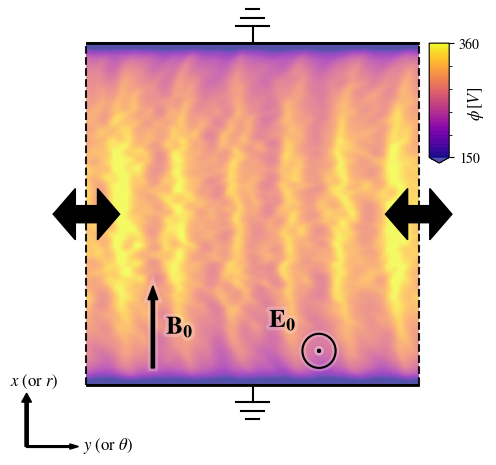

In [95]:
def plot_schematic2D():
    fig, ax = plt.subplots(1, figsize=(4,4))

    Lx, Ly = run._Lx*1e2 ,run._Ly*1e2
    rect_heigh = 0.0* Ly

    plot_snapshot(fig, ax, Ex,Lx,Ly, alpha = 0.7, colorbar= True, cmap ="plasma")

    add_rect(ax, rect_heigh, "up", Lx, Ly), add_rect(ax, rect_heigh, "down", Lx, Ly)

    add_ground(ax,rect_heigh,Lx,Ly)
    add_ground(ax,rect_heigh,Lx,Ly,dy = -0.1)

    add_boundary(ax, rect_heigh, Lx, Ly)

    add_arrow(ax, [Lx, Ly/2], 0.1*Lx, 0, color = "k"), add_arrow(ax, [0, Ly/2], 0.1*Lx, 0, color = "k")
    # add_arrow(ax, [Lx, Ly/2], 0.15*Lx, 0, color = "k"), add_arrow(ax, [0, Ly/2], 0.15*Lx, 0, color = "k")

    addVectors(ax, Lx, Ly)

    addCoords(ax, Lx, Ly)

    return fig

if is_main_module():
    fig = plot_schematic2D()
    # fig.savefig("../images/2D_schema.pdf",ppi =900,bbox_inches = 'tight')
    fig.savefig("/home/tavant/these/Prez_and_rapports/ExB_workshop/Prez/images/2D_schema.pdf",ppi =900,bbox_inches = 'tight')    

TypeError: int() argument must be a string, a bytes-like object or a number, not 'list'

/home/tavant/these/code/venv/stand/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


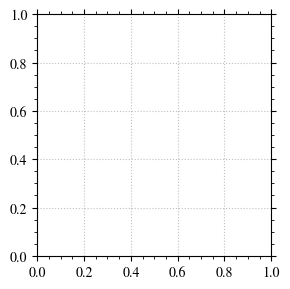

In [18]:
try:
    phi = np.loadtxt("Phi_snapshot")
except:
    phi = run.return_fromkey(int(run._nT*1/2),"Phi").T

    np.savetxt("Phi_snapshot",phi)

def plot_schematic2D():
    fig, ax = plt.subplots(1, figsize=(3,3))

    Lx, Ly = run._Lx*1e2 ,run._Ly*1e2
    rect_heigh = 0.0* Ly

    plot_snapshot(fig, ax, phi,Lx,Ly, alpha = 0.7, colorbar= True, cmap ="plasma")

    add_rect(ax, rect_heigh, "up", Lx, Ly), add_rect(ax, rect_heigh, "down", Lx, Ly)

    add_ground(ax,rect_heigh,Lx,Ly)
    add_ground(ax,rect_heigh,Lx,Ly,dy = -0.1)

    add_boundary(ax, rect_heigh, Lx, Ly)

    add_arrow(ax, [Lx, Ly/2], 0.15*Lx, 0, color = "k"), add_arrow(ax, [0, Ly/2], 0.15*Lx, 0, color = "k")

    addVectors(ax, Lx, Ly)

    addCoords(ax, Lx, Ly)

    return fig

if is_main_module():
    fig = plot_schematic2D()
    fig.savefig("/home/tavant/these/Prez_and_rapports/ESCAMPIG/Poster/images/2D_schema.pdf",ppi =900,bbox_inches = 'tight')

/home/tavant/these/code/venv/stand/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


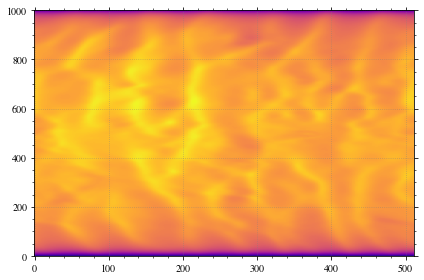

In [25]:
plt.imshow(phi)